## An attempt to model lovel dynamics

Content referred from *Rinaldi, Sergio & Della Rossa, Fabio & Dercole, Fabio & Gragnani, Alessandra & Landi, Pietro. (2015).* **Modeling Love Dynamics.**

In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

from ipywidgets import GridspecLayout

%matplotlib notebook

### Simple equation for love
$\dot{x}_i = R^A_i(A_j, x_i) + R^L_i(x_i, x_j) - O_i(x_i)$

$R^A_i(A_j, x_i) = \gamma_iA_j,$ 

-  $R^A_i$ is the reaction of partner i to the appeal of partner j (appeal is independent of partner j's love, $x_j$)
-  $\gamma_i$ is the reactiveness to appeal

$R^L_i = \beta_ix_j$ 

-  $R^L_i$ is the reaction of partner i to the love of partner j $(x_j)$
-  $\beta_i$ is the reactiveness to love

$O_i(x_i) = \alpha_ix_i$
-  $O_i$ is the oblivion process
-  $\alpha_i$ is the forgetting coefficient

#### Model for a couple
$\dot{x}_1 = -\alpha_1x_1 + \beta_1x_2 + \gamma_1A_2$

$\dot{x}_2 = -\alpha_2x_2 + \beta_2x_1 + \gamma_2A_1$

In [18]:
p = [0.5, 0.4, 0.6, 2.0, 0.0, 0.5, 0.4, 0.6, 2.0, 0.0]
p_names = ['α_1', 'β_1', 'γ_1', 'A_1', 'x0_1', 'α_2', 'β_2', 'γ_2', 'A_2', 'x0_2']

def callback_solve_simple():
    def dl_dt(t, l):
        dldt = np.zeros(2)
        dldt[0] = -p[0]*l[0] + p[1]*l[1] + p[2]*p[3]
        dldt[1] = -p[4]*l[1] + p[5]*l[0] + p[6]*p[7]

        return dldt

    result = scipy.integrate.solve_ivp(dl_dt, (0.0, 1.0), [p[4], p[9]], max_step = 0.1)
    plt.clf()
    plt.plot(result.y[0, :], result.y[1, :])

Our system of love,

$\dot{x} = Ax + b$

We assume asymptotic stability for the system $trace(A) < 0$ and $det(A) > 0$

Hence we have $\beta_1\beta_2 < \alpha_1\alpha_2$

With the stability, we can imply the following

1. If individuals meet for the first time (initial condition = [0, 0]) and develop positive feelings then they remain positive always and reach a positive equilibrium
    - Also the trend for their love progression is smooth


2. If we consider a different initial condition, for example if one person is already in love (one sided love) and then they meet, the feelings of the one sided lover may decrease before increasing or decrease and reach equilibrium
    - Interesting to note this as he/she may have more feelings with one sided experience
    
Play around with different values in the next block

GridspecLayout(children=(BoundedFloatText(value=0.4, description='α_1', layout=Layout(grid_area='widget001', w…

<IPython.core.display.Javascript object>


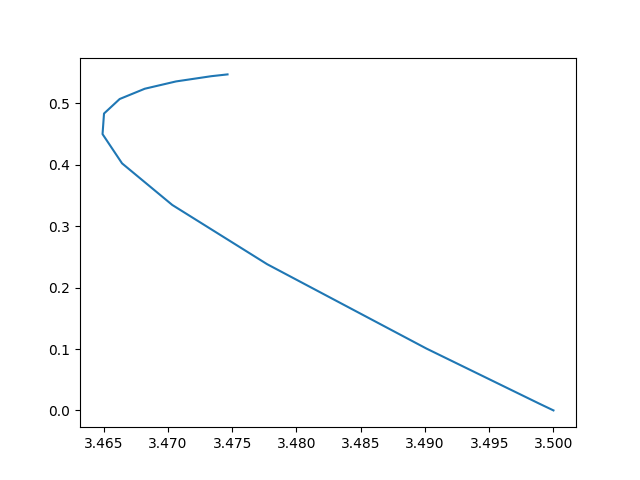

In [21]:
grid = GridspecLayout(2, 5)

def grid_callback(x):
    for i in range(8):
        try:
            if x.owner.description == p_names[i]:
                p[i] = x['new']['value']
                break
        except:
            continue
    
    callback_solve_simple()

for i in range(2):
    for j in range(5):
        grid[i, j] = widgets.BoundedFloatText(
            description = p_names[5*i + j], 
            min=0.0, 
            max=10.0, 
            step=0.01, 
            value=p[5*i + j], 
            layout=widgets.Layout(width='180px')
        )
        grid[i, j].observe(grid_callback)

display(grid)


In [20]:
# slider1, slider2 = widgets.FloatSlider(description='α_1', min=0.0, max=1.0, step=0.01),\
#                    widgets.FloatSlider(description='α_2', min=0.0, max=1.0, step=0.01)

# # l = widgets.link((sliders1, 'value'), (slider2, 'value'))

# def slider_callback(x):
# #     print(x.owner.description)
#     try:
#         if x.owner.description == 'α_1':
#             p[0] = x['new']['value']
#         elif x.owner.description == 'α_2':
#             p[4] = x['new']['value']

#         callback_solve_simple()
#     except:
#         return

# slider1.observe(slider_callback)

# slider2.observe(slider_callback)

# display(slider1, slider2)